### 🥚 **Egg Production: Data Cleaning and Visualization**

- **This notebook loads the dataset `4_Производство_яиц.xlsx`, performs data cleaning by removing empty rows, technical entries, and duplicates, and generates a horizontal bar chart to illustrate egg production levels by category.**  
- Fully empty and irrelevant rows (e.g., technical rows like "Яйца утиные") are removed  
- The dataset is grouped and cleaned to avoid duplicate entries  
- A horizontal bar chart is created to display 2024 egg production volume across categories, measured in units


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 📂 Шаг 1: Загрузка файла с нужного листа
df = pd.read_excel("data/4_Производство_яиц.xlsx", sheet_name="8.", header=4)

# 🧹 Шаг 2: Удалим строки без категории
df = df[df[df.columns[0]].notna()].copy()

# ✏️ Переименуем первую колонку
df = df.rename(columns={df.columns[0]: "Категория"})

# 📥 Оставим только нужные колонки: Категория, 2024, 2023
df_filtered = df[["Категория", df.columns[1], df.columns[2]]].copy()

# 🔢 Преобразуем значения в числовой формат
df_filtered[df.columns[1]] = pd.to_numeric(df_filtered[df.columns[1]], errors='coerce')
df_filtered[df.columns[2]] = pd.to_numeric(df_filtered[df.columns[2]], errors='coerce')

# 🧼 Удалим строки, где оба значения пусты
df_filtered = df_filtered.dropna(subset=[df.columns[1], df.columns[2]], how='all')

# 🔄 Сбросим индекс
df_filtered = df_filtered.reset_index(drop=True)

# 💾 Сохраняем очищенные данные (по желанию)
df_filtered.to_excel("data/4_Производство_яиц_cleaned.xlsx", index=False)

C:\Users\aruzh\AppData\Local\Temp\ipykernel_17208\238176297.py:59: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\aruzh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129370 (\N{EGG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


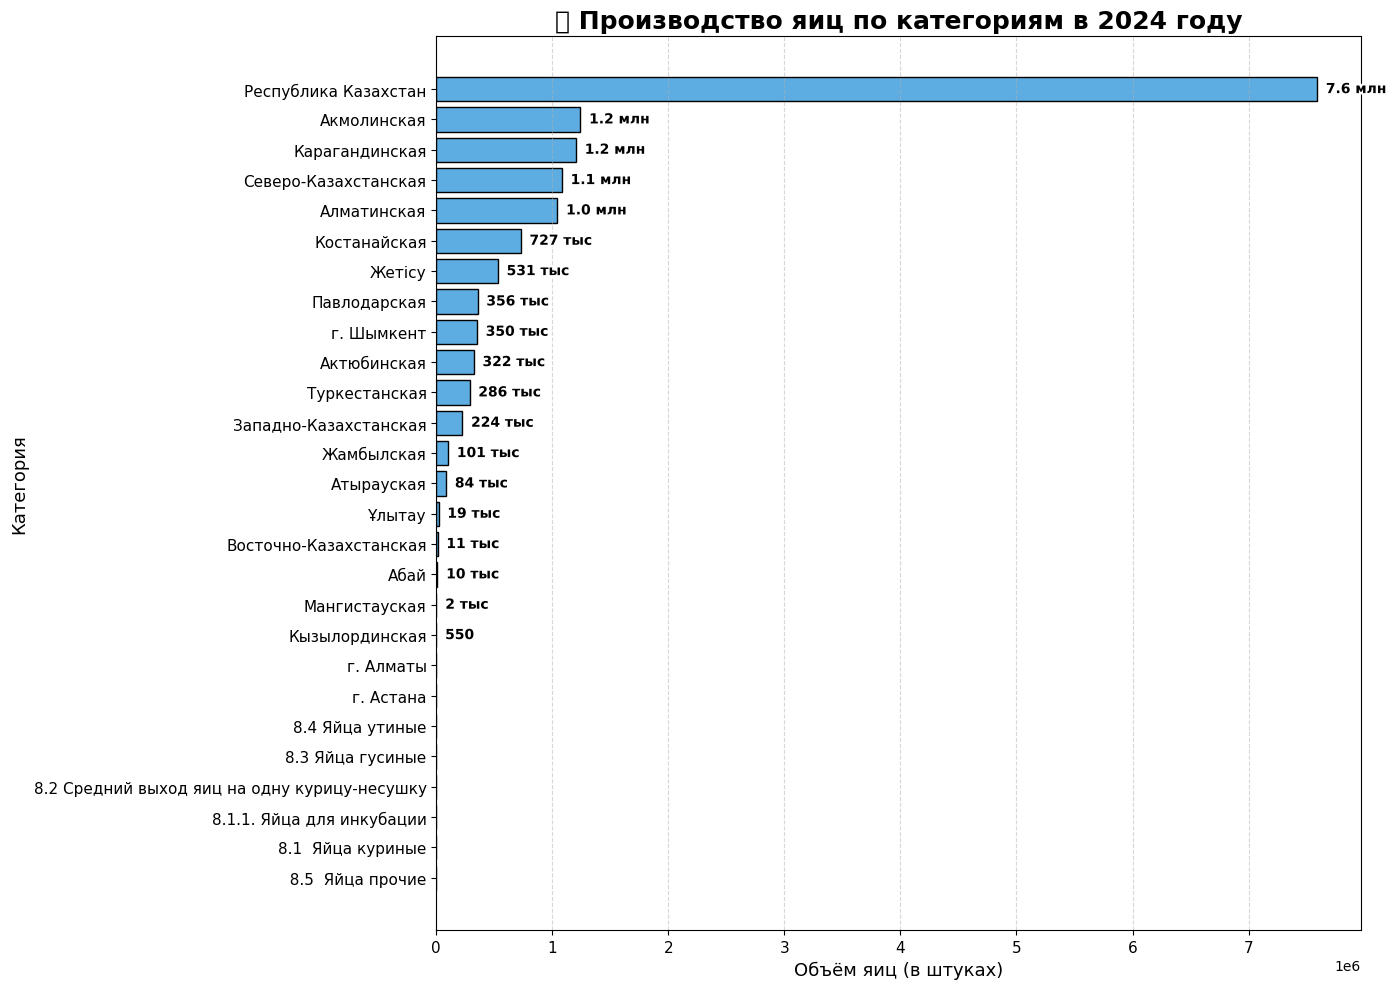

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

# Загрузка
df = pd.read_excel("data/4_Производство_яиц.xlsx", sheet_name="8.", header=4)

# Очистка
df = df[df[df.columns[0]].notna()]
df = df.rename(columns={df.columns[0]: "Категория"})
col_2024 = df.columns[1]
df[col_2024] = pd.to_numeric(df[col_2024], errors='coerce')

# 📦 Группировка по категориям — чтобы избежать повторов
df_grouped = df.groupby("Категория", as_index=False)[col_2024].sum()

# Сортировка
df_sorted = df_grouped.sort_values(by=col_2024, ascending=True).reset_index(drop=True)

# 📊 График
plt.figure(figsize=(14, 10))
bars = plt.barh(df_sorted["Категория"], df_sorted[col_2024], color="#5DADE2", edgecolor="black")

plt.title("🥚 Производство яиц по категориям в 2024 году", fontsize=18, weight='bold')
plt.xlabel("Объём яиц (в штуках)", fontsize=13)
plt.ylabel("Категория", fontsize=13)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Формат подписей
def short_number(n):
    if n >= 1_000_000:
        return f"{n / 1_000_000:.1f} млн"
    elif n >= 1_000:
        return f"{n / 1_000:.0f} тыс"
    elif n > 0:
        return f"{int(n)}"
    else:
        return "0"

# Добавление одной подписи на каждый уникальный столбец
max_val = df_sorted[col_2024].max()
for bar in bars:
    width = bar.get_width()
    if pd.notna(width) and width > 0:
        label = short_number(width)
        x = width + max_val * 0.01
        y = bar.get_y() + bar.get_height() / 2

        txt = plt.text(x, y, label,
                       va='center', ha='left',
                       fontsize=10, weight='bold', color='black')
        txt.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground='white'),
            path_effects.Normal()
        ])

plt.tight_layout()
plt.show()
